У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('../data/yulu_rental.csv')

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

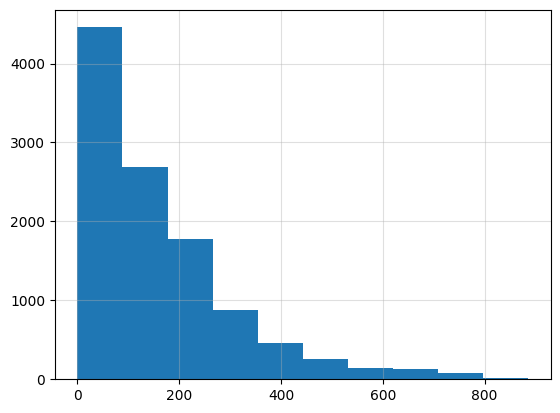

In [20]:
plt.hist(df.registered)
plt.grid(axis='both', alpha=.4);

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву діаграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

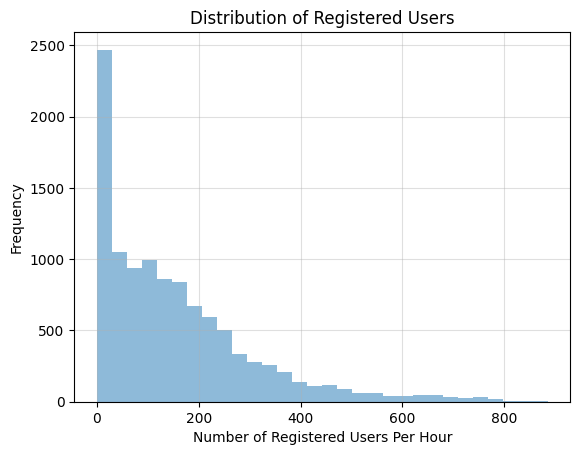

In [25]:
plt.hist(df.registered, bins=30, alpha=0.5)
plt.grid(axis='both', alpha=.4)
plt.title('Distribution of Registered Users')
plt.xlabel('Number of Registered Users Per Hour')
plt.ylabel('Frequency');

Можемо бачити, що більшість реєстрацій припадає  на перші години, перші 200 годин, потім кількість реєстрацій зменшується.
Дані можуть мати такий розподіл, бо це новий продукт і всі хочуть його спробувати. Напочатку була велика кількість реєстрацій з цього можемо зроби висновок, що компанія провела гарну маркетинговую компанію, щоб зацікавити користувачів спробувати свій продукт. Після цього можемо бачити поступовий спад, це може бути з декількох причин або поганий сервіс і людям вже не так цікаво, або погана маркетингова стратегія або її відсутність, призвели до спаду реєстрацій.

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [26]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [27]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [28]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

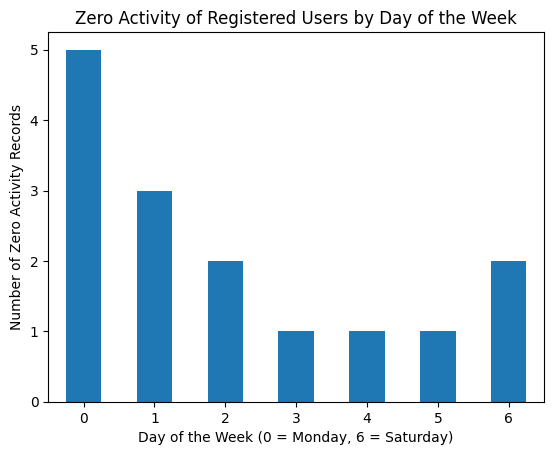

In [40]:
none_registered = df[df.registered == 0].groupby('dayofweek').size().plot(kind='bar')
plt.title('Zero Activity of Registered Users by Day of the Week')
plt.xlabel('Day of the Week (0 = Monday, 6 = Saturday)')
plt.ylabel('Number of Zero Activity Records')
plt.xticks(rotation=0)
none_registered;

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

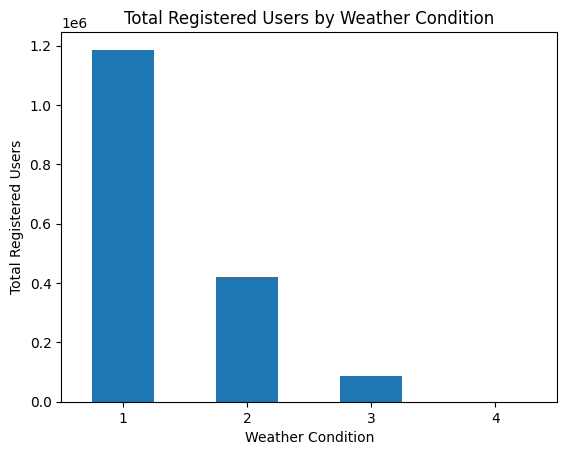

In [47]:
weather_grouped = df.groupby('weather').registered.sum().plot(kind='bar')
plt.title('Total Registered Users by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Registered Users')
plt.xticks(rotation=0)
weather_grouped;

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

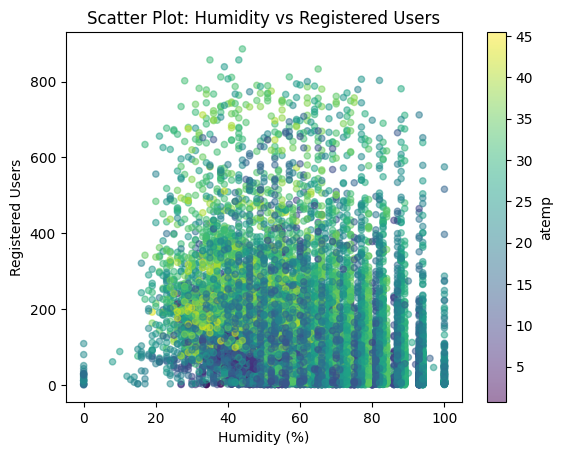

In [50]:
humidity_registered = df.plot.scatter(x='humidity', y='registered', c='atemp', alpha=.5)
plt.title('Scatter Plot: Humidity vs Registered Users')
plt.xlabel('Humidity (%)')
plt.ylabel('Registered Users');

За графіком можемо проаналізувати,що реєстрацій більше в теплу погоду 30-40 градусів і також за меншої вологості в районі 30-60%.
Також бачимо викиди при 0% та 100%, це може свідчити про помилки в даних.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)